In [170]:
from pathlib import Path

SED_HOME = Path.home().joinpath('SED')

#Directorio base donde está instalado el siumulador
CDPP_DIR = SED_HOME.joinpath('CDPP_ExtendedStates-codename-Santi')

CDPP_SRC = CDPP_DIR.joinpath('src')
CDPP_EXAMPLES = CDPP_DIR.joinpath('examples')
CDPP_SCRIPTS = CDPP_DIR.joinpath('scripts')
BASE_BIN = CDPP_SRC.joinpath('bin')
CDPP_ATOMICS = CDPP_SRC.joinpath('cd++/atomics')

In [171]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/D2D

make clean

make

g++ -c -I../../src/cd++/parser -I../../src/cd++/parser/cdlang -I../../src/cd++/parser/cdlang/obj -I../../src/cd++/parser/obj -I../../src/cd++/cell -I../../src/cd++/cell/obj -I../../src/cd++/val -I../../src/cd++/val/obj -I../../src/cd++/msg -I../../src/cd++/msg/obj -I../../src/cd++/warped -I../../src/cd++/warped/common -I../../src/cd++/warped/common/obj -I../../src/cd++/warped/notime -I../../src/cd++/warped/notime/obj -I../../src/cd++/misc -I../../src/cd++/misc/obj -I../../src/cd++/misc/math -I../../src/cd++/misc/math/obj -I../../src/cd++/proc -I../../src/cd++/proc/obj -I../../src/cd++/proc/state -I../../src/cd++/proc/state/obj -I../../src/cd++/utils -I../../src/cd++/utils/obj -I../../src/cd++/utils/log -I../../src/cd++/utils/log/obj -I../../src/cd++/model -I../../src/cd++/model/obj -I../../src/cd++/model/state -I../../src/cd++/model/state/obj -I../../src/cd++/atomics -I../../src/cd++/atomics/qss -I../../src/cd++/atomics/qss/obj -I../../src/cd++/atomics/queue -I../../src/cd++/atomics/qu

In file included from ../../src/cd++/val/tbool.h:21,
                 from ../../src/cd++/val/real.h:22,
                 from ../../src/cd++/utils/strutil.h:28,
                 from ../../src/cd++/model/pmodeladm.h:29,
                 from ../../src/cd++/model/port.h:25,
                 from ../../src/cd++/model/model.h:26,
                 from ../../src/cd++/msg/message.h:26,
                 from due.cpp:7:
../../src/cd++/val/tuple_value.h: In instantiation of ‘const T& Tuple<T>::operator[](int) const [with T = Real]’:
../../src/cd++/val/tuple_value.h:117:13:   required from ‘bool Tuple<T>::equals(const AbstractValue&) const [with T = Real]’
../../src/cd++/val/tuple_value.h:107:6:   required from here
../../src/cd++/val/tuple_value.h:59:30: warning: comparison of integer expressions of different signedness: ‘int’ and ‘std::vector<Real, std::allocator<Real> >::size_type’ {aka ‘long unsigned int’} [-Wsign-compare]
  MASSERT(index >= 0 && index < this->values.size());
../../src/cd+

In [172]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/D2D

bin/cd++ -m model/D2D_suburban_1.ma \
         -o D2D_suburban_1.out \
         -l D2D_suburban_1.log \
         -t 00:05:00:00

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from model/D2D_suburban_1.ma
Loading events from 
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: D2D_suburban_1.log
Output to: D2D_suburban_1.out
Tolerance set to: 1e-08
Configuration to show real numbers: 

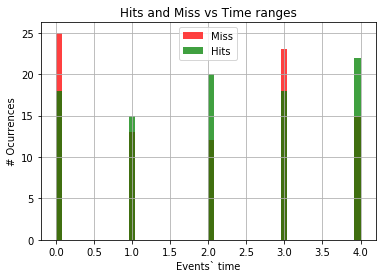

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# file path
OUT_FILENAME = str(CDPP_EXAMPLES)+"/D2D/D2D_suburban_1.out"

# def colums names of pandas dataframes
TIME_COL = 'time'
PORT_COL = 'port'
VALUE_COL = 'value'

def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return 1
    return 0

# conversion VTime a float
def time_to_min(time):
    h, m, s, ms, r = time.split(':')
    return float(m)

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_min
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

is_hit =  salida['value']==1 

is_miss = salida['value']==0 

salida_hits = salida[is_hit]

salida_miss = salida[is_miss]


n2, bins2, patches2 = plt.hist(salida_miss['time'], 50, density=False, facecolor='r', alpha=0.75,label='Miss')
n1, bins1, patches1 = plt.hist(salida_hits['time'], 50, density=False, facecolor='g', alpha=0.75,label='Hits')

plt.xlabel('Events` time')
plt.ylabel('# Ocurrences')
plt.title('Hits and Miss vs Time ranges')
plt.grid(True)
plt.legend();


In [149]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/D2D

bin/cd++ -m model/D2D_suburban_2.ma \
         -o D2D_suburban_2.out \
         -l D2D_suburban_2.log \
         -t 00:05:00:00

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from model/D2D_suburban_2.ma
Loading events from 
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: D2D_suburban_2.log
Output to: D2D_suburban_2.out
Tolerance set to: 1e-08
Configuration to show real numbers: 

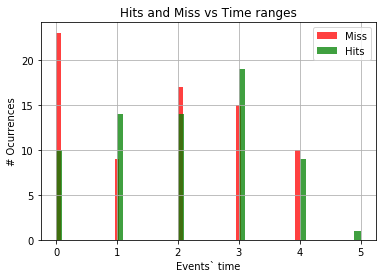

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# file path
OUT_FILENAME = str(CDPP_EXAMPLES)+"/D2D/D2D_suburban_2.out"

# def colums names of pandas dataframes
TIME_COL = 'time'
PORT_COL = 'port'
VALUE_COL = 'value'

def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return 1
    return 0

# conversion VTime a float
def time_to_min(time):
    h, m, s, ms, r = time.split(':')
    return float(m)

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_min
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

is_hit =  salida['value']==1 

is_miss = salida['value']==0 

salida_hits = salida[is_hit]

salida_miss = salida[is_miss]


n2, bins2, patches2 = plt.hist(salida_miss['time'], 50, density=False, facecolor='r', alpha=0.75,label='Miss')
n1, bins1, patches1 = plt.hist(salida_hits['time'], 50, density=False, facecolor='g', alpha=0.75,label='Hits')

plt.xlabel('Events` time')
plt.ylabel('# Ocurrences')
plt.title('Hits and Miss vs Time ranges')
plt.grid(True)
plt.legend();

In [115]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/D2D

bin/cd++ -m model/D2D_urban_1.ma \
         -o D2D_urban_1.out \
         -l D2D_urban_1.log \
         -t 00:05:00:00

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from model/D2D_urban_1.ma
Loading events from 
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: D2D_urban_1.log
Output to: D2D_urban_1.out
Tolerance set to: 1e-08
Configuration to show real numbers: Width = 1

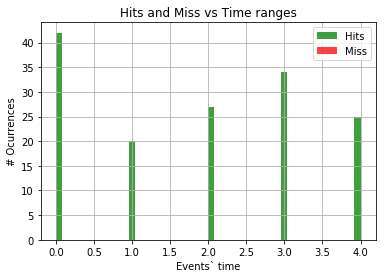

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# file path
OUT_FILENAME = str(CDPP_EXAMPLES)+"/D2D/D2D_urban_1.out"

# def colums names of pandas dataframes
TIME_COL = 'time'
PORT_COL = 'port'
VALUE_COL = 'value'

def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return 1
    return 0

# conversion VTime a float
def time_to_min(time):
    h, m, s, ms, r = time.split(':')
    return float(m)

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_min
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

is_hit =  salida['value']==1 

is_miss = salida['value']==0 

salida_hits = salida[is_hit]

salida_miss = salida[is_miss]

n1, bins1, patches1 = plt.hist(salida_hits['time'], 50, density=False, facecolor='g', alpha=0.75,label='Hits')
n2, bins2, patches2 = plt.hist(salida_miss['time'], 50, density=False, facecolor='r', alpha=0.75,label='Miss')

plt.xlabel('Events` time')
plt.ylabel('# Ocurrences')
plt.title('Hits and Miss vs Time ranges')
plt.grid(True)
plt.legend();

In [119]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/D2D

bin/cd++ -m model/D2D_urban_2.ma \
         -o D2D_urban_2.out \
         -l D2D_urban_2.log \
         -t 00:05:00:00

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from model/D2D_urban_2.ma
Loading events from 
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: D2D_urban_2.log
Output to: D2D_urban_2.out
Tolerance set to: 1e-08
Configuration to show real numbers: Width = 1

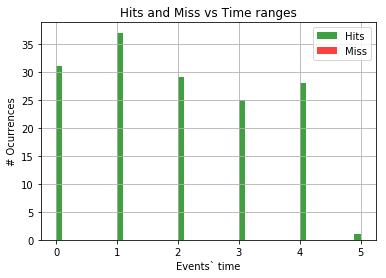

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# file path
OUT_FILENAME = str(CDPP_EXAMPLES)+"/D2D/D2D_urban_2.out"

# def colums names of pandas dataframes
TIME_COL = 'time'
PORT_COL = 'port'
VALUE_COL = 'value'

def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return 1
    return 0

# conversion VTime a float
def time_to_min(time):
    h, m, s, ms, r = time.split(':')
    return float(m)

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_min
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

is_hit =  salida['value']==1 

is_miss = salida['value']==0 

salida_hits = salida[is_hit]

salida_miss = salida[is_miss]

n1, bins1, patches1 = plt.hist(salida_hits['time'], 50, density=False, facecolor='g', alpha=0.75,label='Hits')
n2, bins2, patches2 = plt.hist(salida_miss['time'], 50, density=False, facecolor='r', alpha=0.75,label='Miss')

plt.xlabel('Events` time')
plt.ylabel('# Ocurrences')
plt.title('Hits and Miss vs Time ranges')
plt.grid(True)
plt.legend();